In [6]:
# https://machinelearningmastery.com/feature-selection-for-regression-data/
# https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("./streamflow.csv", header=0, index_col=0)
print(data.describe())
print(data.head())

             value
count  1560.000000
mean      7.600878
std       7.035977
min       0.800000
25%       2.800000
50%       4.465000
75%      10.305000
max      32.790000
           value
time            
8-1-1871   24.00
9-1-1871   25.80
10-1-1871  17.60
11-1-1871   9.13
12-1-1871   6.48


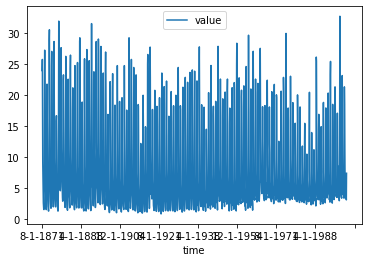

In [9]:
from matplotlib import pyplot
# line plot of dataset
data.plot()
pyplot.show()

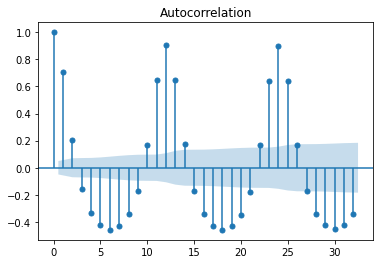

In [10]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
pyplot.show()

The plot shows lag values along the x-axis and correlation on the y-axis between -1 and 1 for negatively and positively correlated lags respectively.

The dots above the blue area indicate statistical significance. The correlation of 1 for the lag value of 0 indicates 100% positive correlation of an observation with itself.

The plot shows significant lag values at 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 months


## Time Series to Supervised Learning



In [12]:
from pandas import read_csv
from pandas import DataFrame
# load dataset
series = read_csv('streamflow.csv', header=0, index_col=0)

# reframe as supervised learning
dataframe = DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = series.shift(i).values[:,0]
dataframe['t'] = series.values[:,0]

print(dataframe.head(13))
dataframe = dataframe[13:]
# save to new file
dataframe.to_csv('lags_12months_features.csv', index=False)

    t-12  t-11  t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
0    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  24.00   
3    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  24.00  25.80   
4    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN  24.00  25.80  17.60   
5    NaN   NaN   NaN    NaN    NaN    NaN    NaN  24.00  25.80  17.60   9.13   
6    NaN   NaN   NaN    NaN    NaN    NaN  24.00  25.80  17.60   9.13   6.48   
7    NaN   NaN   NaN    NaN    NaN  24.00  25.80  17.60   9.13   6.48   4.48   
8    NaN   NaN   NaN    NaN  24.00  25.80  17.60   9.13   6.48   4.48   2.59   
9    NaN   NaN   NaN  24.00  25.80  17.60   9.13   6.48   4.48   2.59   1.95   
10   NaN   NaN  24.0  25.80  17.60   9.13   6.48   4.48   2.59   1.95   1.57   
11   NaN  24.0  25.8  17.60   9.13   6.4

## Feature Importance of Lag Variables

Ensembles of decision trees, like bagged trees, random forest, and extra trees, can be used to calculate a feature importance score.

This is common in machine learning to estimate the relative usefulness of input features when developing predictive models.

We can use feature importance to help to estimate the relative importance of contrived input features for time series forecasting.

This is important because we can contrive not only the lag observation features above, but also features based on the timestamp of observations, rolling statistics, and much more. Feature importance is one method to help sort out what might be more useful in when modeling.

The example below loads the supervised learning view of the dataset created in the previous section, fits a random forest model (RandomForestRegressor), and summarizes the relative feature importance scores for each of the 12 lag observations.

A large-ish number of trees is used to ensure the scores are somewhat stable. Additionally, the random number seed is initialized to ensure that the same result is achieved each time the code is run.

This process can be repeated with different methods that can calculate importance scores, such as gradient boosting, extra trees, and bagged decision trees.

In [ ]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# load data
dataframe = read_csv('lags_12months_features.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

## Feature Selection of Lag Variables

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The example below uses RFE with a random forest predictive model and sets the desired number of input features to 4.


Selected Features:
t-12
t-11
t-2
t-1


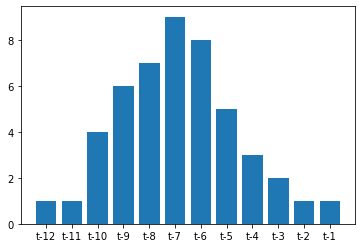

In [15]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load dataset
dataframe = read_csv('lags_12months_features.csv', header=0)
# separate into input and output variables
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.

This process can be repeated with different numbers of features to select more than 4 and different models other than random forest.

## Final results

In [ ]:
# example of correlation feature selection for numerical data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# load the dataset
def load_dataset(filename, cols=None):
    # load the dataset as a pandas DataFrame
    if cols is None:
        data = pd.read_csv(f"{filename}.csv")
    else:
        data = pd.read_csv(f"{filename}.csv", usecols=cols)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

# feature selection
def select_features(X_train, y_train, X_test, test_func="ANOVA", k_type='all'):
    if test_func == "ANOVA":
        score_func = f_regression
    elif test_func == "MI":
        score_func = mutual_info_regression
    # configure to select all features
    fs = SelectKBest(score_func=score_func, k=k_type)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# timeseries to supervised
def timeseries_to_supervised(filename, header=0, index_col=0, n_lags=24):
    # load dataset
    series = pd.read_csv(f'{filename}.csv', header=header, index_col=index_col)
    # reframe as supervised learning
    df = DataFrame()
    for i in range(n_lags, 0, -1):
        df['t-' + str(i)] = series.shift(i).values[:,0]
    cols_name = df.columns
    df['t'] = series.values[:,0]
    df = df[n_lags+1:]
    # save to new file
    filename = f"{filename}-{n_lags}_lags"
    df.to_csv(f'{filename}.csv', index=False)
    return filename, cols_name

# show results 
def show_results(scores, x_ticks, filename, figsize=(8, 4), verbose=True):
    plt.figure(figsize=(8, 4))
    
    # what are scores for the features
    for idx, score in enumerate(scores):
        print(f'Feature {x_ticks[idx]}: {score}')
        
    # plot the scores
    plt.bar(x_ticks, scores)
    plt.xticks(rotation=45, ha='right')
    plt.savefig(filename, bbox_inches='tight')
    if verbose:
        plt.show()

In [ ]:
from matplotlib import pyplot as plt

# make supervised dataset
filename, cols_name = timeseries_to_supervised("streamflow", header=0, index_col=0, n_lags=24)
    
# load the dataset and split into input (X) and output (y) variables
X, y = load_dataset(filename)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, shuffle=False)

print(X_train[1])
print(y_train[1])

In [ ]:
# feature selection using ANOVA-test 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, "ANOVA", 'all')

# show results
show_results(fs.scores_, cols_name, "anova.png", figsize=(7, 4), verbose=True)

In [ ]:
# feature selection using mutual information
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, "MI", 'all')

# show results
show_results(fs.scores_, cols_name, "mi.png", figsize=(7, 4), verbose=True)